In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [50]:
train = pd.read_csv('project-4-GADSI/kaggle_data/train.csv')
weather = pd.read_csv('project-4-GADSI/kaggle_data/weather.csv')
spray = pd.read_csv('project-4-GADSI/kaggle_data/spray.csv')

train.drop(columns=['Address','Street','AddressNumberAndStreet','Block','AddressAccuracy'],inplace=True)
weather.drop(columns=['CodeSum','Heat','Cool','Water1','Depth','Sunrise','Sunset'],inplace=True)
spray.drop(columns=['Time'],inplace=True)

train['Datetime'] = pd.to_datetime(train.Date)
weather['Datetime'] = pd.to_datetime(weather.Date)
spray['Datetime'] = pd.to_datetime(spray.Date)

train['yr'] = [x.year for x in train.Datetime]
train['mo'] = [x.month for x in train.Datetime]
train['day'] = [x.day for x in train.Datetime]

weather['yr'] = [x.year for x in weather.Datetime]
weather['mo'] = [x.month for x in weather.Datetime]
weather['day'] = [x.day for x in weather.Datetime]

spray['yr'] = [x.year for x in spray.Datetime]
spray['mo'] = [x.month for x in spray.Datetime]
spray['day'] = [x.day for x in spray.Datetime]

train.drop(columns='Date',inplace=True)
weather.drop(columns='Date',inplace=True)
spray.drop(columns='Date',inplace=True)

# Station 2 has too many missing values, so we'll just use station 1
weather = weather[weather.Station == 1]

# Some sprays occurred well away from any stations and will not be useful for analysis
spray = spray[spray.Latitude < 42.1]
spray = spray[spray.Longitude > -87.86]

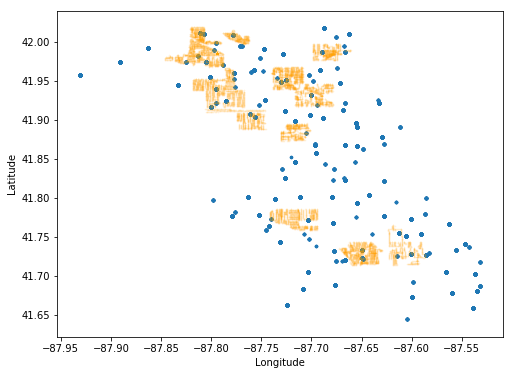

In [52]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(train.Longitude,train.Latitude,s=6);
plt.scatter(spray.Longitude,spray.Latitude,s=1,alpha=0.1,c='orange',marker='*');
plt.xlabel('Longitude'), plt.ylabel('Latitude');

In [370]:
cluster_1 = spray[spray.Latitude > 41.97]
cluster_1 = cluster_1[cluster_1.Longitude < -87.75]
cluster_1['cluster'] = [1 for x in cluster_1.Latitude]
cluster_1_lat_range = [41.97, 42]
cluster_1_lon_range = [-87.85, -87.75]

cluster_2 = spray[(spray.Latitude < 41.97) & (spray.Latitude > 41.85)]
cluster_2 = cluster_2[cluster_2.Longitude < -87.74]
cluster_2['cluster'] = [2 for x in cluster_2.Latitude]
cluster_2_lat_range = [41.85, 41.97]
cluster_2_lon_range = [-87.85, -87.74]

cluster_3 = spray[(spray.Latitude > 41.95)]
cluster_3 = cluster_3[cluster_3.Longitude > -87.70]
cluster_3['cluster'] = [3 for x in cluster_3.Latitude]

cluster_4 = spray[(spray.Latitude > 41.90) & (spray.Latitude < 41.97)]
cluster_4 = cluster_4[cluster_4.Longitude > -87.74] 
cluster_4['cluster'] = [4 for x in cluster_4.Latitude]

cluster_5 = spray[(spray.Latitude > 41.85) & (spray.Latitude < 41.90)]
cluster_5 = cluster_5[cluster_5.Longitude > -87.74] 
cluster_5['cluster'] = [5 for x in cluster_5.Latitude]

cluster_6 = spray[spray.Latitude < 41.80]
cluster_6 = cluster_6[cluster_6.Longitude < -87.68]
cluster_6['cluster'] = [6 for x in cluster_6.Latitude]

cluster_7 = spray[spray.Latitude < 41.75]
cluster_7 = cluster_7[cluster_7.Longitude < -87.63]
cluster_7['cluster'] = [7 for x in cluster_7.Latitude]

cluster_8 = spray[spray.Longitude > -87.63]
cluster_8['cluster'] = [8 for x in cluster_8.Latitude]

cluster_1_2011_0907 = cluster_1[cluster_1.yr == 2011]
cluster_1_2013_0905 = cluster_1[(cluster_1.yr == 2013) & (cluster_1.mo == 9)]
cluster_1_2013_0717 = cluster_1[(cluster_1.yr == 2013) & (cluster_1.mo == 7)]

cluster_2_2013_0815 = cluster_2[(cluster_2.yr == 2013) & (cluster_2.day == 15)]
cluster_2_2013_0816 = cluster_2[(cluster_2.yr == 2013) & (cluster_2.day == 16)]
cluster_2_2011_0907 = cluster_2[(cluster_2.yr == 2011) & (cluster_2.mo == 9)]

cluster_3_2013_0829 = cluster_3

cluster_4_2013_0725 = cluster_4[cluster_4.mo == 7]
cluster_4_2013_0808 = cluster_4[cluster_4.mo == 8]

cluster_5_2013_0822 = cluster_5

cluster_6_2013_0829 = cluster_6

cluster_7_2013_0717 = cluster_7

cluster_8_2013_0717 = cluster_8[cluster_8.mo == 7]
cluster_8_2013_0822 = cluster_8[cluster_8.mo == 8]

/Users/aprilgriffin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [397]:
import geopandas as gpd
import descartes
from shapely.geometry import Point

In [398]:
city_bound = gpd.read_file('Chicago_boundaries/geo_export_55fcb48c-7621-4c8a-999c-9fb3c86e8950.shp')

Text(0.5,1,'City of Chicago Historical Spray Zones')

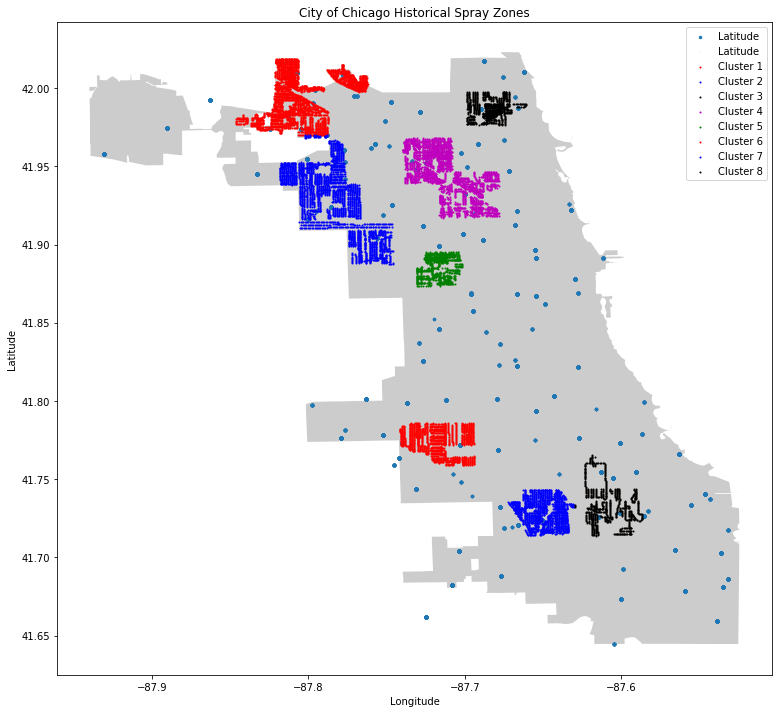

In [403]:

fig,ax=plt.subplots(figsize=(15,12))
city_bound.plot(color='gray',ax=ax,alpha=0.4)
plt.scatter(train.Longitude,train.Latitude,s=6);
plt.scatter(spray.Longitude,spray.Latitude,s=1,alpha=0.1,c='orange',marker='*');

plt.scatter(cluster_1.Longitude,cluster_1.Latitude,s=1,c='r',marker='o',label='Cluster 1')
plt.scatter(cluster_2.Longitude,cluster_2.Latitude,s=1,c='b',marker='o',label='Cluster 2')
plt.scatter(cluster_3.Longitude,cluster_3.Latitude,s=1,c='k',marker='o',label='Cluster 3')
plt.scatter(cluster_4.Longitude,cluster_4.Latitude,s=1,c='m',marker='o',label='Cluster 4')
plt.scatter(cluster_5.Longitude,cluster_5.Latitude,s=1,c='green',marker='o',label='Cluster 5')
plt.scatter(cluster_6.Longitude,cluster_6.Latitude,s=1,c='r',marker='o',label='Cluster 6')
plt.scatter(cluster_7.Longitude,cluster_7.Latitude,s=1,c='b',marker='o',label='Cluster 7')
plt.scatter(cluster_8.Longitude,cluster_8.Latitude,s=1,c='k',marker='o',label='Cluster 8')
plt.legend()
plt.xlabel('Longitude'), plt.ylabel('Latitude');
plt.title('City of Chicago Historical Spray Zones')

In [224]:
def check_cluster(lat,lon):
    if ((lat in cluster_1.Latitude.values) and (lon in cluster_1.Longitude.values)):
        cluster = 1
    elif (lat in cluster_2.Latitude.values) and (lon in cluster_2.Longitude.values):
        cluster = 2
    elif (lat in cluster_3.Latitude.values) and (lon in cluster_3.Longitude.values):
        cluster = 3
    elif (lat in cluster_4.Latitude.values) and (lon in cluster_4.Longitude.values):
        cluster = 4
    elif (lat in cluster_5.Latitude.values) and (lon in cluster_5.Longitude.values):
        cluster = 5    
    elif (lat in cluster_6.Latitude.values) and (lon in cluster_6.Longitude.values):
        cluster = 6
    elif (lat in cluster_7.Latitude.values) and (lon in cluster_7.Longitude.values):
        cluster = 7
    elif (lat in cluster_8.Latitude.values) and (lon in cluster_8.Longitude.values):
        cluster = 8 
    else:
        cluster = 0
    return cluster   

In [225]:
spray['cluster'] = [0 for x in spray.Latitude]
clusters = []
for ind,row in spray.iterrows():
    lat = row.Latitude
    lon = row.Longitude
    cluster = check_cluster(lat,lon)
    clusters.append(cluster)
spray['cluster'] = clusters

In [269]:
traps = train.drop(columns=['Species','NumMosquitos','WnvPresent','Datetime','yr','mo','day'])

traps_list = []
for trap in traps.Trap:
    if not trap in traps_list:
        traps_list.append(trap)

trap_dict = {}
for trap in traps_list:
    lat = list(traps[traps.Trap == trap].Latitude)[0]
    lon = list(traps[traps.Trap == trap].Longitude)[0]
    trap_dict[trap] = [lat,lon]

In [270]:
centroids = []
centroids.append((cluster_1.Latitude.mean(),cluster_1.Longitude.mean()))
centroids.append((cluster_2.Latitude.mean(),cluster_2.Longitude.mean()))
centroids.append((cluster_3.Latitude.mean(),cluster_3.Longitude.mean()))
centroids.append((cluster_4.Latitude.mean(),cluster_4.Longitude.mean()))
centroids.append((cluster_5.Latitude.mean(),cluster_5.Longitude.mean()))
centroids.append((cluster_6.Latitude.mean(),cluster_6.Longitude.mean()))
centroids.append((cluster_7.Latitude.mean(),cluster_7.Longitude.mean()))
centroids.append((cluster_8.Latitude.mean(),cluster_8.Longitude.mean()))

In [ ]:
traps.drop_duplicates(subset='Trap',inplace=True)
traps['cluster'] = clust_list

In [358]:
clust_list = []
for key,val in trap_dict.items():
    trap_lat = val[0]
    trap_lon = val[1]
    distances = []
    for center in centroids:
        center_lat = center[0]
        center_lon = center[1]
        distances.append(np.sqrt((trap_lat-center_lat)**2 + (trap_lon-center_lon)**2))
    min_dist = 1000
    for ind,dist in enumerate(distances):
        if dist < min_dist:
            min_dist = dist
            cluster = ind+1
    if min_dist > 0.03:
        cluster = 0
    if cluster == 5 or cluster == 3 or cluster == 7:
        if min_dist > 0.015:
            cluster = 0
    if cluster == 6:
        if min_dist > 0.025:
            cluster = 0
    trap_dict[key] = (trap_lat,trap_lon,cluster)
    clust_list.append(cluster)

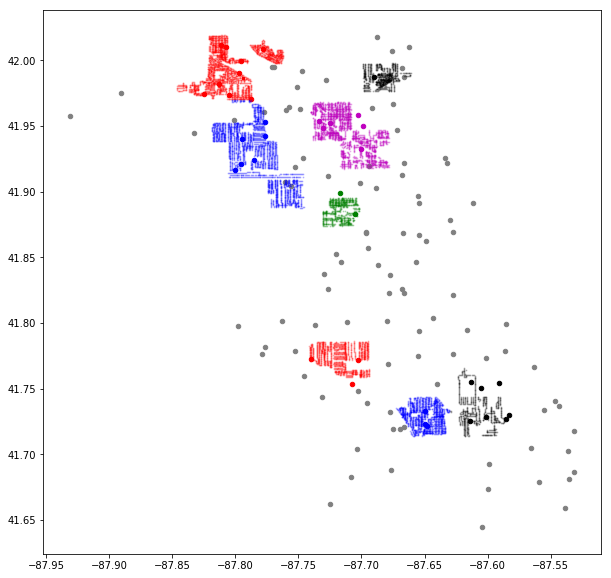

In [359]:
plt.figure(figsize=(10,10))
for key,val in trap_dict.items():
    c = val[2]
    if c == 1: col = 'r'
    elif c == 2: col = 'b'
    elif c == 3: col = 'k'
    elif c == 4: col = 'm'
    elif c == 5: col = 'green'
    elif c == 6: col = 'r'
    elif c == 7: col = 'b'
    elif c == 8: col = 'k'
    elif c == 0: col = 'gray'
    plt.scatter(val[1],val[0],s=20,c=col)

plt.scatter(cluster_1.Longitude,cluster_1.Latitude,s=1,alpha=0.2,c='r',marker='o')
plt.scatter(cluster_2.Longitude,cluster_2.Latitude,s=1,alpha=0.2,c='b',marker='o')
plt.scatter(cluster_3.Longitude,cluster_3.Latitude,s=1,alpha=0.2,c='k',marker='o')
plt.scatter(cluster_4.Longitude,cluster_4.Latitude,s=1,alpha=0.2,c='m',marker='o')
plt.scatter(cluster_5.Longitude,cluster_5.Latitude,s=1,alpha=0.2,c='green',marker='o')
plt.scatter(cluster_6.Longitude,cluster_6.Latitude,s=1,alpha=0.2,c='r',marker='o')
plt.scatter(cluster_7.Longitude,cluster_7.Latitude,s=1,alpha=0.2,c='b',marker='o')
plt.scatter(cluster_8.Longitude,cluster_8.Latitude,s=1,alpha=0.2,c='k',marker='o')